# Imports

In [ ]:
#!pip install malaya_speech
#!pip install pydub

In [9]:
import malaya_speech
import numpy as np
import librosa
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment
from pydub.silence import split_on_silence
import librosa

# Functions

## Load Audio

In [2]:
def load_audio(path): # return y (1d array), sr (int)
    return malaya_speech.load(path)

## Remove Silence Frames

In [3]:
from scipy.special import ynp_zeros
def remove_silence(y, sr, top_db = 30): # return y (1d array)
  y_int = malaya_speech.astype.float_to_int(y)
  audio = AudioSegment(
      y_int.tobytes(),
      frame_rate = sr,
      sample_width = y_int.dtype.itemsize,
      channels = 1
  )
  audio_chunks = split_on_silence(
      audio,
      min_silence_len = 200,
      silence_thresh = -30,
      keep_silence = 100,
  )
  y_ = sum(audio_chunks)
  y_ = np.array(y_.get_array_of_samples())
  y_ = malaya_speech.astype.int_to_float(y_)
  return y_

## Extract 64-dimensional Log Mel-Spectogram

In [4]:
def get_log_mel_spectrogram(sig, sampling_rate, window_size, hop_size, epsilon=1e-7):
  mel_spectra = librosa.feature.melspectrogram(
      sig,
      sr=sampling_rate,
      n_fft=window_size,
      hop_length=hop_size
  )
  log_mel_spectogram = np.transpose(np.log10(mel_spectra + epsilon))
  return log_mel_spectogram 

## Mean and Varience Normalization for each mel-frequency bin

In [5]:
def mean_and_var_normalization_of_each_frequency_mel_spectrogram(mel_spectrogram, epsilon=1e-7):
    mean = np.mean(mel_spectrogram, axis=0)
    std = np.std(mel_spectrogram, axis=0)
    return (mel_spectrogram - mean) / (std + epsilon)

# Integrate All Functions

In [6]:
sig , sample_rate = load_audio("/content/test0.wav")

In [7]:
silence_removed_sig = remove_silence(sig,sample_rate)

## Spectogram - 1

In [15]:
mel_spectogram = get_log_mel_spectrogram(silence_removed_sig , sample_rate,25,10) 

/usr/local/lib/python3.8/dist-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


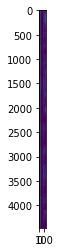

In [16]:
plt.imshow(mel_spectogram)

In [17]:
norm_spectogram = mean_and_var_normalization_of_each_frequency_mel_spectrogram(mel_spectogram)

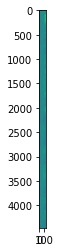

In [18]:
plt.imshow(norm_spectogram)

## Spectogram - 2

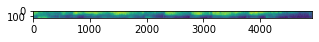

In [14]:
ps = librosa.feature.melspectrogram(y=sig, sr=sample_rate, win_length=25,hop_length=10)
ps_db= librosa.power_to_db(ps, ref=np.max)
#plt.figure(figsize=(5,5))
plt.imshow(ps_db)

In [19]:
norm_ps = mean_and_var_normalization_of_each_frequency_mel_spectrogram(ps_db)

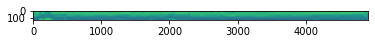

In [20]:
plt.imshow(norm_ps)